# 1. Customer Churn Veri Seti

~ Customer Churn Dataset
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv

~ Müşteri kaybı veri kümesi  ilgili özellikleri ve müşteri kaybı etiketleriyle birlikte 440882 müşteri kaydı koleksiyonunu içerir.

~ Her kayıt bir müşteriyi temsil eder ve yaş, cinsiyet, görev süresi, kullanım sıklığı, destek çağrıları, ödeme gecikmesi, abonelik türü, sözleşme uzunluğu, toplam harcama ve son etkileşim gibi özellikleri içerir. 

~ Churn etiketi, müşterinin müşteriyi kaybettiğini (1) veya kaybetmediğini (0) gösterir. 

****

# 2.  Veri Seti Hazırlığı

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [6]:
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv")
df = df_.copy()

****

># 2. 1. NaN değerler yaratma 

In [7]:
#Veri setinde rasgele eksik veriler oluşturma

import random


# add_random_missing_values fonksiyonu, bir DataFrame'e eksik değerler ekler
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
   
    # DataFrame kopyası oluşturma
    df_missing = dataframe.copy()

    # Eksik değer sayısı hesaplama
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Rastgele sayı üretme
    if seed:
        random.seed(seed)

    # Rastgele satır ve sütun Seçimi:
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

#DataFrame'e %3 oranında eksik değer eklenir.
df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

****

# 3. Veri Seti İnceleme

In [8]:
# Veri setinin ilk 5 gözlemi
df.head(n = 5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,NaN,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


****

~ Customer ID sadece müşteri kayıtlarını eşsiz şekilde tanımlıyor. Analiz için bir anlamı yok. Herhangi bir hedef değişkene de bir etkisi olmayacağı için sildim.

In [9]:
#CustomerID sütununu silme
df = df.drop(columns=['CustomerID'])

****

~ columns() ile veri setindeki değişkenlerin isimlerine erişme.

~ len fonksiyonu ile toplam sütun sayısını bulma.

In [10]:
# Veri setindeki sütunlar ve toplam sütun sayısı

column_names = pd.DataFrame(df.columns, columns=['Sütun İsimleri'])

# Toplam sütun sayısını hesaplama
total_columns = len(df.columns)

print("Veri Setindeki Sütun İsimleri:")
print(column_names)
print(f"\nToplam Sütun Sayısı: {total_columns}")

Veri Setindeki Sütun İsimleri:
       Sütun İsimleri
0                 Age
1              Gender
2              Tenure
3     Usage Frequency
4       Support Calls
5       Payment Delay
6   Subscription Type
7     Contract Length
8         Total Spend
9    Last Interaction
10              Churn

Toplam Sütun Sayısı: 11


****

~ info() fonksiyonunu kullanarak veri setinin yapısı hakkında bilgi edinebiliriz, örneğin sütun isimlerini, veri türlerini, eksik değer sayısını ve toplam sütun sayısını görebiliriz.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                427774 non-null  float64
 1   Gender             427697 non-null  object 
 2   Tenure             427890 non-null  float64
 3   Usage Frequency    427785 non-null  float64
 4   Support Calls      427901 non-null  float64
 5   Payment Delay      427843 non-null  float64
 6   Subscription Type  427682 non-null  object 
 7   Contract Length    427741 non-null  object 
 8   Total Spend        427729 non-null  float64
 9   Last Interaction   427716 non-null  float64
 10  Churn              427921 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


****

~ dtypes ile sütunları ve bunların veri tiplerini görüntüleme.

In [12]:
df.dtypes

Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

****

~ unique() fonksiyonu ile her sütundaki benzersiz değerleri görüntüleme.

In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} Benzersiz Değerler ({len(unique_values)} adet):")
    print(pd.DataFrame(unique_values, columns=[column]))
    print("\n")

Age Benzersiz Değerler (49 adet):
     Age
0   30.0
1   65.0
2   55.0
3   58.0
4   23.0
5   51.0
6   39.0
7   64.0
8   29.0
9   52.0
10  22.0
11  48.0
12  24.0
13  49.0
14  19.0
15  47.0
16  42.0
17  57.0
18  27.0
19  59.0
20  21.0
21  60.0
22  35.0
23  18.0
24  56.0
25  20.0
26  63.0
27  25.0
28  28.0
29  32.0
30  38.0
31  37.0
32  31.0
33  53.0
34  41.0
35  33.0
36  26.0
37  36.0
38  44.0
39  34.0
40  61.0
41  40.0
42  45.0
43   NaN
44  46.0
45  54.0
46  43.0
47  50.0
48  62.0


Gender Benzersiz Değerler (3 adet):
   Gender
0  Female
1    Male
2     NaN


Tenure Benzersiz Değerler (61 adet):
    Tenure
0     39.0
1     49.0
2     14.0
3     38.0
4     32.0
..     ...
56    27.0
57     9.0
58    20.0
59    57.0
60    36.0

[61 rows x 1 columns]


Usage Frequency Benzersiz Değerler (31 adet):
    Usage Frequency
0              14.0
1               1.0
2               4.0
3              21.0
4               NaN
5              25.0
6              12.0
7               8.0
8               

****

VERİ SETİNDEKİ SÜTUNLAR


--Kategorik Sütunlar--

~ Gender -> müşterinin cinsiyeti, veri tipi object  ( Female - Male)

~ Subscription Type -> müşterinin abone oldugu paket türü, veri tipi object  (Standart - Basic - Premium)

~ Contract Length -> müşterinin sözleşme süresi,  veri tipi object (Annual - Monthly - Quarterly)


--Numerik Sütunlar--

~ Age -> müşterinin yaşını, veri tipi float 

~ Tenure -> müşterinin geçirdiği süre,  veri tipi float

~ Usage Frequency -> müşterinin kullanım sıklığı, veri tipi float

~ Support Calls -> müşterinin görüşme sayısı, veri tipi float

~ Payment Delay -> müşterinin ödemede geçikme sayısı, veri tipi float

~ Total Spend -> müşterinin toplam harcama miktarı, veri tipi float

~ Last Interaction -> müşterinin son etkileşiminden sonra geçen süre, veri tipi float

~ Churn -> müşteri kaybı, veri tipi float. -- Burada churn 1 ve 0 değerlerini alıyor yani ya müşteri kaybı ya da değil. Bunu kategorik değişkene dönüştürmemiz gerekiyor.

****

~ churn değişkenini kategorik yapma

In [14]:
df['Churn'] = pd.Categorical(df['Churn'].map({0: 'No', 1: 'Yes'}), categories=['No', 'Yes'], ordered=False)


In [15]:
df.dtypes

Age                   float64
Gender                 object
Tenure                float64
Usage Frequency       float64
Support Calls         float64
Payment Delay         float64
Subscription Type      object
Contract Length        object
Total Spend           float64
Last Interaction      float64
Churn                category
dtype: object

In [16]:
df['Churn'][:5]

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']

****

~ kategorik ve numerik değişkenleri ayrı listelerde tutma.

In [17]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype in ["object", "category"]:
        categorical_features.append(col)
    else:
        numerical_features.append(col)


~ object tipteki değşkenleri de kategorik tip yapma.

In [18]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [19]:
#Veri tiplerini kontrol etme.

df.dtypes

Age                   float64
Gender               category
Tenure                float64
Usage Frequency       float64
Support Calls         float64
Payment Delay         float64
Subscription Type    category
Contract Length      category
Total Spend           float64
Last Interaction      float64
Churn                category
dtype: object

****

~ Kategorik sütunların frekanslarını görüntüleme.

In [20]:
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)  

Column: Gender
Gender
Male      242808
Female    184889
Name: count, dtype: int64
------------------------------
Column: Subscription Type
Subscription Type
Standard    144594
Premium     144313
Basic       138775
Name: count, dtype: int64
------------------------------
Column: Contract Length
Contract Length
Annual       171885
Quarterly    171309
Monthly       84547
Name: count, dtype: int64
------------------------------
Column: Churn
Churn
Yes    242597
No     185324
Name: count, dtype: int64
------------------------------


****

~ describe() metodu ile verisetindeki sayısal sütunlar hakkında özet istatistiksel bilgileri görüntüleyebiliriz.

In [21]:
summary = df.describe().T 

print(summary)

                     count        mean         std    min    25%    50%  \
Age               427774.0   39.368809   12.445871   18.0   29.0   39.0   
Tenure            427890.0   31.262317   17.253462    1.0   16.0   32.0   
Usage Frequency   427785.0   15.809769    8.586941    1.0    9.0   16.0   
Support Calls     427901.0    3.604479    3.070686    0.0    1.0    3.0   
Payment Delay     427843.0   12.970510    8.259023    0.0    6.0   12.0   
Total Spend       427729.0  631.697853  240.762626  100.0  481.0  661.0   
Last Interaction  427716.0   14.479091    8.597111    1.0    7.0   14.0   

                    75%     max  
Age                48.0    65.0  
Tenure             46.0    60.0  
Usage Frequency    23.0    30.0  
Support Calls       6.0    10.0  
Payment Delay      19.0    30.0  
Total Spend       830.0  1000.0  
Last Interaction   22.0    30.0  


****

# 4. Eksik Veri Analizi

****

~ Veri setinde toplam eksik değer sayısı ve eksik olmayan değer sayısı ve toplam eksik değer sayısının toplam kayıt sayısına oranı.

In [22]:
# Toplam eksik değer sayısı
total_missing = df.isna().sum().sum()

# Toplam eksik olmayan değer sayısı
total_non_missing = df.notna().sum().sum()

# Toplam kayıt sayısı
total_records = len(df) * len(df.columns)

# Eksik değerlerin toplam kayıt sayısına oranı
missing_percentage = (total_missing / total_records) * 100


print("Toplam Eksik Değer Sayısı:", total_missing)
print("Toplam Eksik Olmayan Değer Sayısı:", total_non_missing)
print("Eksik Değerlerin Toplam Kayıt Sayısına Oranı (%):", missing_percentage)

Toplam Eksik Değer Sayısı: 143484
Toplam Eksik Olmayan Değer Sayısı: 4705679
Eksik Değerlerin Toplam Kayıt Sayısına Oranı (%): 2.9589436362522767


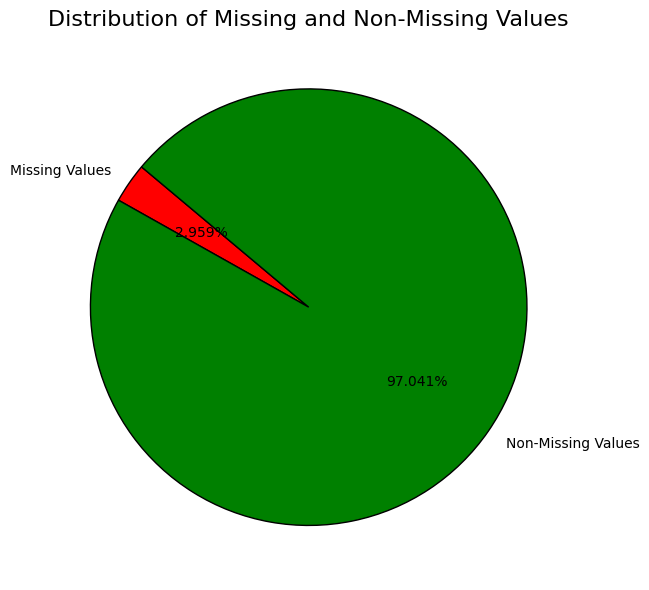

In [23]:
# Verisetinde eksik ve eksik olmayan değerlerin pasta grafiği/ pie chart ile görselleştirilmesi

labels = ['Missing Values', 'Non-Missing Values']
sizes = [total_missing, total_non_missing]
colors = ['red', 'green']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%0.3f%%', startangle=140, wedgeprops={'edgecolor': 'black'})


plt.title('Distribution of Missing and Non-Missing Values', fontsize=16)

plt.tight_layout()
plt.show()

~ Veri setinde eksik değerlerin oranı oldukça düşük (yaklaşık %2.95). Bu, veri setinin büyük bir kısmının eksik veri içermediği anlamına geliyor.


****

~ isna() ve sum() fonksiyonları ile veri setindeki her sütunun eksik değer sayısını bulma.

In [24]:
missing_values = df.isna().sum()

print(missing_values)

Age                  13059
Gender               13136
Tenure               12943
Usage Frequency      13048
Support Calls        12932
Payment Delay        12990
Subscription Type    13151
Contract Length      13092
Total Spend          13104
Last Interaction     13117
Churn                12912
dtype: int64


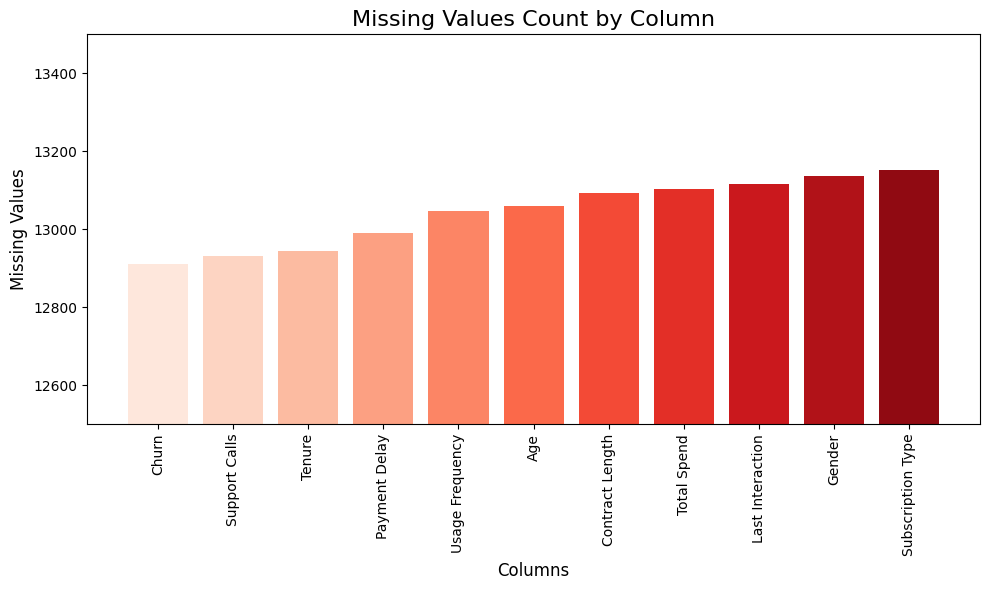

In [25]:
#Sütunlardaki eksik değerlerin sayılarını çubuk grafik/bar chart ile görselleştirme

#Küçükten büyüğe sırala
missing_values_sorted = missing_values.sort_values()

#Açık renkten koyuya
colors = sns.color_palette("Reds", len(missing_values_sorted))

#Bar chart 
plt.figure(figsize=(10, 6))
plt.bar(missing_values_sorted.index, missing_values_sorted.values, color=colors)


plt.xticks(rotation=90) #Sütun isimlerini döndür
plt.title('Missing Values Count by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.ylim(12500, 13500)  # Eksik değer sayıları arası sınır


plt.tight_layout()
plt.show()

~ Tüm sütunlar için eksik veri sayıları benzer düzeyde; bu da veri setinin geneline yayılan bir eksik veri durumu olduğunu gösteriyor.

~ Fakat son etkileşimden sonra geçen süre, cinsiyet ve abone oldugu paket sayısı sütunları diğerlerine göre daha fazla eksik veri içeriyor.

****

~ Her bir sütun için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu bulma.

In [26]:
# Toplam satır sayısı
total_rows = len(df)

# Eksik değerlerin toplam kayıt sayısına oranını hesaplama ve yüzdeye çevirme
missing_percentage = (missing_values / total_rows) * 100


print("Her Bir Değişken İçin Eksik Değerlerin Toplam Kayıt Sayısına Oranı (%)")
print(missing_percentage)

Her Bir Değişken İçin Eksik Değerlerin Toplam Kayıt Sayısına Oranı (%)
Age                  2.962346
Gender               2.979813
Tenure               2.936032
Usage Frequency      2.959851
Support Calls        2.933537
Payment Delay        2.946694
Subscription Type    2.983216
Contract Length      2.969832
Total Spend          2.972554
Last Interaction     2.975503
Churn                2.929000
dtype: float64


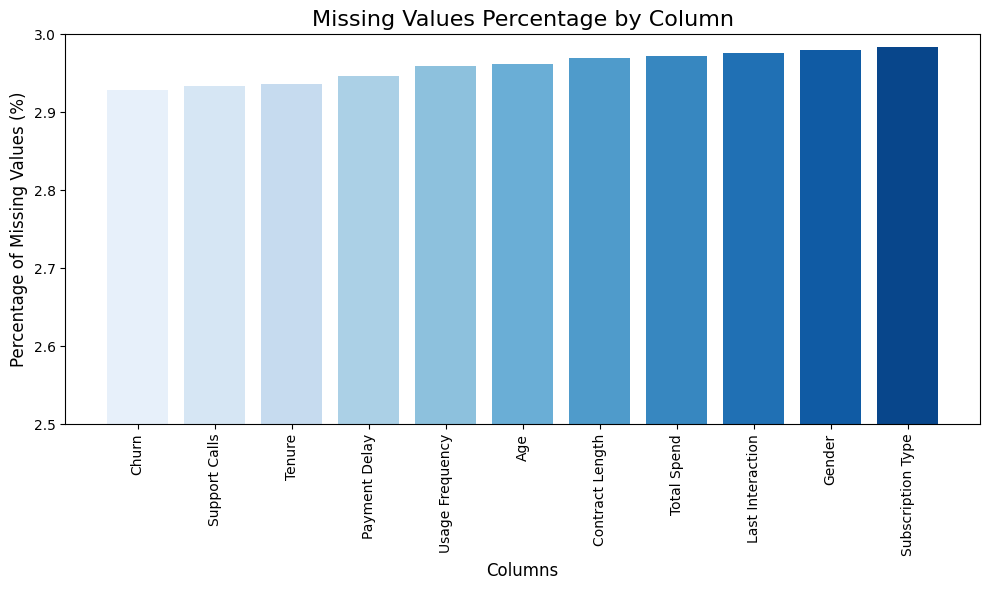

In [27]:
#Eksik değerlerin toplam kayıt sayısına oranlarını sütunlara göre çubuk grafik/bar chart ile görselleştirme

#Küçükten büyüğe sırala
missing_percentage_sorted = missing_percentage.sort_values()

#Açık renkten koyuya
colors = sns.color_palette("Blues", len(missing_percentage_sorted))

#bar chart 
plt.figure(figsize=(10, 6))
plt.bar(missing_percentage_sorted.index, missing_percentage_sorted.values, color=colors)


plt.title('Missing Values Percentage by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.ylim(2.5, 3)  # Yüzde aralığı 0-100


plt.xticks(rotation=90)  #Sütun isimlerini döndür
plt.tight_layout()
plt.show()

~ Bu oranlar oldukça düşük, yani eksik veriler veri setinin küçük bir kısmını oluşturuyor. Bu modelleme sürecinde eksik verilerin çok fazla problem yaratmayacağı anlamına gelir.

~ Verilerdeki eksikliklerin genellikle rastgele olabileceği(eksik verileri bu şekilde yaratmıştık) yani eksik verilerin belirli bir özellik veya faktöre göre  eksik olmadığı anlamını çıkarabliriz.

****

~ Veri setinde her bir satır bir kayıttan oluşuyor ve bu kayıtların 12 özelliği var.

~ Bu kayıtların 12 özelliğinden kaç tanesinde eksik veriye sahip olduğunu görme.

In [28]:
#Eksik veri sayısını her bir satır için hesaplama
missing_values_per_row = df.isnull().sum(axis=1)

#Her bir eksik veri sayısına sahip satırların sayısını bulma
missing_values_count = missing_values_per_row.value_counts().sort_index()


for missing_count, count in missing_values_count.items():
    print(f"{missing_count} eksik sütunu olan {count} satır var.")

0 eksik sütunu olan 316943 satır var.
1 eksik sütunu olan 105989 satır var.
2 eksik sütunu olan 16326 satır var.
3 eksik sütunu olan 1472 satır var.
4 eksik sütunu olan 94 satır var.
5 eksik sütunu olan 8 satır var.
11 eksik sütunu olan 1 satır var.


****

~ missingno kütüphanesinin matrix fonksiyonu ile Last Interaction ve Churn sütunlarının eksik verilerin görselleştirilmesi.

!pip install missingno 

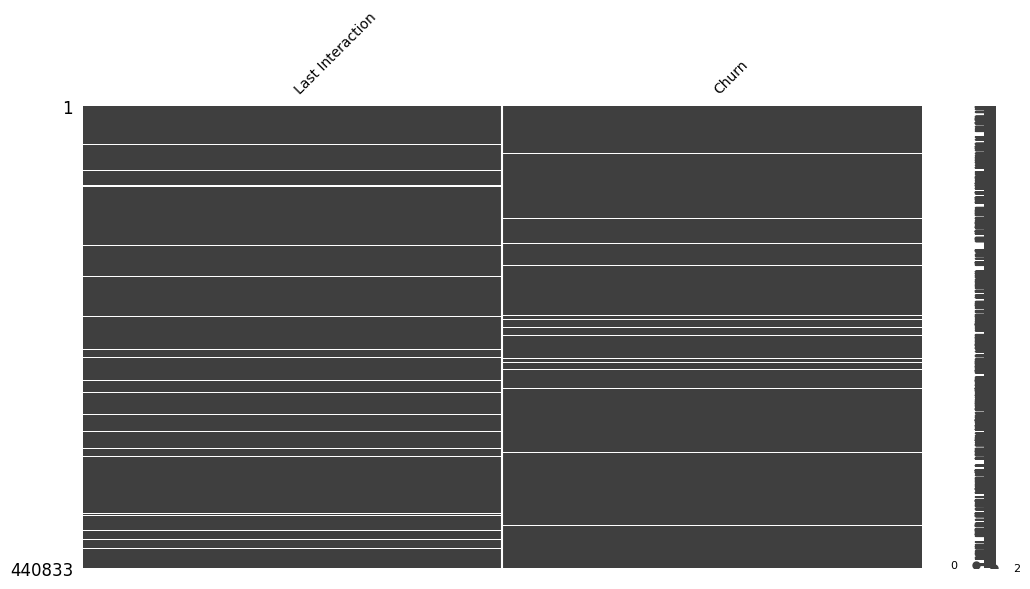

In [29]:
msno.matrix(df = df[['Last Interaction', 'Churn']],
            figsize = (12, 6),
            fontsize = 10);

****

~ Nullity Correlation Heatmap ile  eksik verilerin birbirleriyle nasıl ilişkilendiğini görselleştirme.

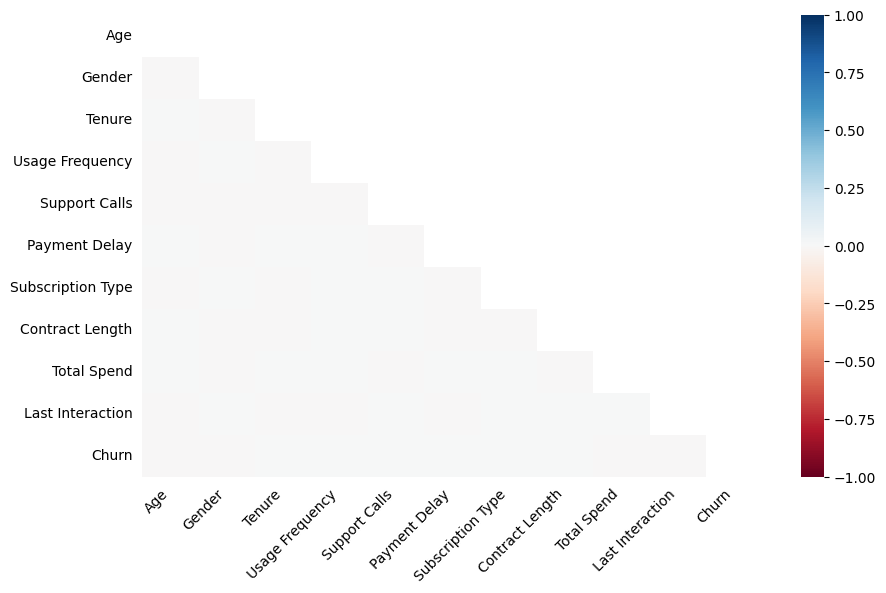

In [30]:
#Nullity Correlation (Heatmap)

msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

~ Hücreler açık renkte yani 0'a yakın.Yani sütunlar arasındaki eksik verilerin birbirine çok az bağımlı olduğunu veya birbirini çok etkilemediğini gösterebilir. 

****

# 5. Eksik Verilerin Silinmesi ve Doldurulması

-- Eksik Verilerin Genel Durumu --

~ Toplam Eksik Değer Sayısı: 143,484 eksik değer var, yani veri setinin %2.96’sı eksik. Eksik Olmayan Değer Sayısı: 4,705,679 değer eksiksiz.
Veri setinin büyük kısmı dolu yani az miktarda eksik veri var. Sütunların da  eksik değer oranı genellikle çok yüksek değil ve eksik veri oranları %2.93 ile %2.98 arasında değişiyor. 

~ Eksik değerler, genellikle her satırda farklı sayıda eksik olabiliyor. En çok sayıda eksik olan satır, yalnızca 1 eksik değere sahip olan 105,989 satır. Bunun dışında, çok fazla eksik değeri olan birkaç satır da bulunuyor. Ancak 0 eksik olan satır sayısı çok büyük, bu da çoğu satırın eksiksiz olduğunu gösteriyor.

~ Sütunlardaki eksik değerlere baktığımızda heatmapdeki sonuca göre eksik değerlerin sadece rastgele dağılmış olduğunu ve sütunlar arasında herhangi bir belirgin bağımlılık olmadığını görüyoruz. Bu durum, eksik verileri doldururken her sütunun ayrı ayrı değerlendirilmesi gerektiğini ve birbirlerinden bağımsız bir şekilde ele alınacağını bize gösteriyor.

~ Eksik verilerin büyük çoğunluğu  1 veya 2 sütunda eksik olan satırlardan oluşuyor. Bu, veri kaybının minimal olduğunu ve bu satırların genellikle doldurulabilir olduğunu gösteriyor. Eksik sütun sayısı arttıkça, satırların silinmesi daha mantıklı olabilir. Özellikle 3 veya daha fazla eksik sütun olan satırlarda, doldurma işlemi veriyi bozabilir ve hata payını arttırabilir.

****

3 eksik sütunu olan 1472 satır var.

4 eksik sütunu olan 94 satır var.

5 eksik sütunu olan 8 satır var.

11 eksik sütunu olan 1 satır var.

2'den sütunda eksik değer olan satırları sileceğim çünkü buralarda doldurma işlemi veriyi bozabilir.
Toplamda 1575 satırı silmiş olacağız.

In [31]:
# silmeden önce verisetinin satır sayısı
df.shape

(440833, 11)

In [32]:
# thresh parametresi, bir satırın korunabilmesi için minimum kaç değerinin eksiksiz olması gerektiğini belirler
# Burada, df.shape[1] - 3 ile 3'ten fazla eksik sütun olan satırları siliyoruz

df_cleaned = df.dropna(thresh=df.shape[1] - 2, inplace=False)

In [33]:
df_cleaned.shape

(439258, 11)

~ Satırların eksik değerli sütun sayılarını kontrol etme.

In [34]:
#Eksik veri sayısını her bir satır için hesaplama
missing_values_per_row = df_cleaned.isnull().sum(axis=1)

#Her bir eksik veri sayısına sahip satırların sayısını bulma
missing_values_count = missing_values_per_row.value_counts().sort_index()


for missing_count, count in missing_values_count.items():
    print(f"{missing_count} eksik sütunu olan {count} satır var.")

0 eksik sütunu olan 316943 satır var.
1 eksik sütunu olan 105989 satır var.
2 eksik sütunu olan 16326 satır var.


~ Sütunlardaki eksik değerleri kontrol etme.

In [35]:
missing_values = df_cleaned.isna().sum()

print(missing_values)

Age                  12624
Gender               12696
Tenure               12487
Usage Frequency      12627
Support Calls        12518
Payment Delay        12553
Subscription Type    12721
Contract Length      12652
Total Spend          12666
Last Interaction     12645
Churn                12452
dtype: int64


In [36]:
# Toplam satır sayısı
total_rows = len(df_cleaned)

# Eksik değerlerin toplam kayıt sayısına oranını hesaplama ve yüzdeye çevirme
missing_percentage = (missing_values / total_rows) * 100


print("Her Bir Değişken İçin Eksik Değerlerin Toplam Kayıt Sayısına Oranı (%)")
print(missing_percentage)

Her Bir Değişken İçin Eksik Değerlerin Toplam Kayıt Sayısına Oranı (%)
Age                  2.873937
Gender               2.890329
Tenure               2.842748
Usage Frequency      2.874620
Support Calls        2.849806
Payment Delay        2.857774
Subscription Type    2.896020
Contract Length      2.880312
Total Spend          2.883499
Last Interaction     2.878718
Churn                2.834780
dtype: float64


****

> # 5. 1. Kategorik Değişken Analizi - Eksik veri Silme ve oldurma

****

>> # 5. 1. 1. Gender Kategorik Sütununun Analizi

~ Gender kategorik sütunu Female ve Male değerlerini alıyor.

~ Gender sütunundaki eksik verilerin doldurulmasında kullanılacak bir strateji oluşturmak için, cinsiyetin diğer kategorik verilerle ilişkisi analiz ederek eğer bariz bir ilişki varsa bu sütunlara uyumlu doldurma işlemi yapacağım.

~ Aralarındaki ilişkiyi Gender sütunun diğer kategorik sütunlarla yani Churn(müşteri kaybı), Contract Length(Sözleşme Süresi), Subscription Type(Abonelik türü) sütunlarıyla ilişkisini contingecy table (farklı kategoriler arasındaki frekansları gösteren bir tablo) ile görmek amacım.

~ Contingecy table her satırın toplamına bölünerek normalize edildi.Bu işlem, her bir cinsiyet için toplamda %100 üzerinden oranlanmasını sağlıyor.
(Örneğin, Female için her abonelik türünün oranı, tüm kadın kullanıcıların toplam aboneliklerine oranlanmıştır.)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


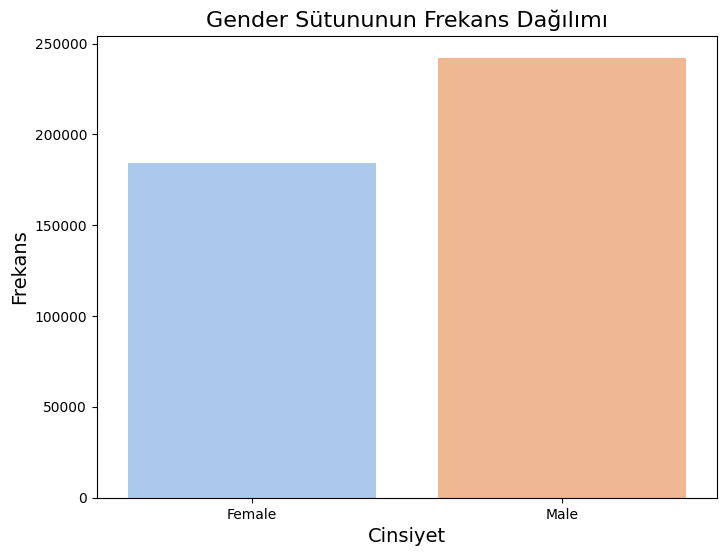

Gender
Male      242185
Female    184377
Name: count, dtype: int64

In [37]:
#Gender sütunundaki değerlerin sdağılımı
#Gender sütunundaki frekansların hesaplanması
gender_counts = df_cleaned['Gender'].value_counts()

#Çubuk grafiğin çizilmesi
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.title("Gender Sütununun Frekans Dağılımı", fontsize=16)
plt.xlabel("Cinsiyet", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.xticks(rotation=0)
plt.show()

gender_counts

In [38]:
categorical_features = []
numerical_features = []

for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ["object", "category"]:
        categorical_features.append(col)
    else:
        numerical_features.append(col)

~ Gender'ı diğer kategorik sütunlarla karşılaştırma

~ Gender (Cinsiyet) ve Subscription Type (Abonelik Türü) sütunları arasında bir kontenjan tablosu (contingency table) oluşturma.

In [39]:
#Gender ve Subscription Type sütunu için Stacked Bar Chart
contingency_table = pd.crosstab(df_cleaned['Gender'], df_cleaned['Subscription Type'])

#Normalize ederek 
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

contingency_table_normalized 

Subscription Type,Basic,Premium,Standard
Gender,,,
Female,0.325023,0.335796,0.339181
Male,0.324069,0.338865,0.337066


~ Kadın ve erkekler arasında abonelik türü tercihleri açısından anlamlı bir fark yok. Ancak küçük farklılıklar gözlemleniyor.

~ Kadınlar Standard abonelik türüne biraz daha yatkın.
~ Erkekler ise Premium aboneliği biraz daha fazla tercih ediyor.

~ Buradan eksik veri doldurmaya yönelik bir bilgi çıkartamadım.

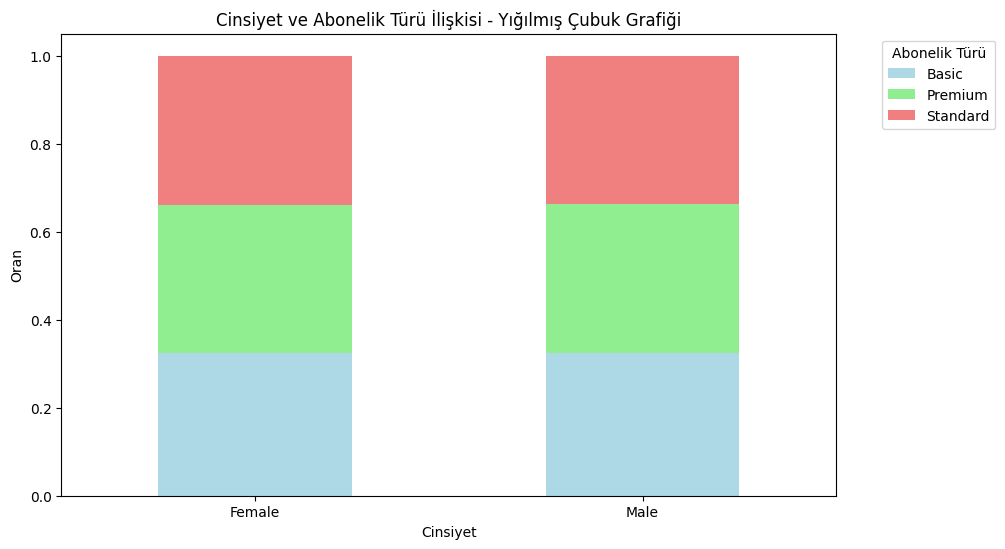

In [40]:
#Grafik 
contingency_table_normalized.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['lightblue', 'lightgreen', 'lightcoral']
)
plt.title('Cinsiyet ve Abonelik Türü İlişkisi - Yığılmış Çubuk Grafiği')
plt.xlabel('Cinsiyet')
plt.ylabel('Oran')
plt.xticks(rotation=0)
plt.legend(title='Abonelik Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


****

~ Gender ile  Contract Length sütunu arasındaki ilişkiyi inceleme.

~ Kadın (Female) ve Erkek (Male) arasındaki sözleşme uzunluğu (Contract Length) dağılımı

In [41]:
#Gender ve Contract Length sütunu için Stacked Bar Chart
contingency_table = pd.crosstab(df_cleaned['Gender'], df_cleaned['Contract Length'])

#Normalize ederek 
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

contingency_table_normalized 

Contract Length,Annual,Monthly,Quarterly
Gender,,,
Female,0.385391,0.228441,0.386168
Male,0.414391,0.174108,0.411501


~ Erkekler, kadınlara kıyasla yıllık(Annual), sözleşmeleri biraz daha fazla tercih ediyor (erkeklerin %41.4'ü yıllık sözleşme, kadınların ise %38.5'i).

~ Monthly sözleşmeler kadınlar için (%22.8) daha yaygınken, erkekler için daha az tercih ediliyor (%17.4).

~ Üç aylık sözleşmeler, hem kadınlar hem de erkekler arasında benzer oranlarla tercih ediliyor, ancak erkeklerin biraz daha fazla (%41.2) üç aylık sözleşme tercih ettiğini görebiliyoruz.

~ Bu ilişki yalnızca cinsiyet ile sözleşme uzunluğu arasındaki dağılımı gösteriyor. Eğer gender sütunundaki veriler eksikse ve bir kişinin sözleşme uzunluğu biliniyorsa, bu dağılımdan faydalanarak eksik gender değerlerini tahmin edebiliriz.

~ Örneğin eğer bir kişinin sözleşme uzunluğu "Yıllık" (Annual) ise, cinsiyetinin kadın veya erkek olma olasılığı %38.5 kadın ve %41.4 erkek şeklindedir.

~ Bu durumda, eksik veriyi doldurmak için bu olasılıkları kullanabiliriz. Fakat bariz bir fark olmadığı için Gender eksik verilerini doldururken bunu dikkate almayacağım.

****

~ Gender ile  Churn sütunu arasındaki ilişkiyi inceleme.
~ Kadın (Female) ve Erkek (Male) arasındaki Müşteri Kaybı dağılımı.

In [42]:
#Gender ve Contract Length sütunu için Stacked Bar Chart
contingency_table = pd.crosstab(df_cleaned['Gender'], df_cleaned['Churn'])

#Normalize ederek 
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

contingency_table_normalized 

Churn,No,Yes
Gender,,
Female,0.333415,0.666585
Male,0.509025,0.490975


~ Kadınlar (Female) arasında, Churn = Yes (müşteri kaybı) oranı oldukça yüksek (%66.66). Bu, kadınlarda erkeklere kıyasla daha fazla müşteri kaybı oldugunu gösteriyor.

~ Erkekler (Male) arasında ise, Churn = No (müşteri kaybı olmayan) oranı daha yüksek (%50.90), ve Churn = Yes (müşteri kaybı) oranı %49.09 ile oldukça dengeli bir dağılım sergiliyor. Yani erkeklerde müşteri kaybı oranı kadınlara göre daha düşük.

~ Kadınların daha fazla müşteri kaybı yaşadığı gözlemi, kadın müşteri kayıplarını hedef alacak özel stratejiler geliştirmek için faydalı olabilir.

~ Eğer Churn sütunu mevcutsa, eksik Gender verilerini Churn bilgisine göre doldurabiliriz.
Churn = Yes (müşteri kaybı) olan kadınlar, kadınlar için daha yüksek bir oranda müşteri kaybı yaşadığını gösteriyor, bu nedenle eksik Gender verilerine sahip Churn = Yes (müşteri kaybı) verilerini büyük olasılıkla Female (kadın) olarak doldurabiliriz.
Churn = No (müşteri kaybı olmayan) olan erkekler ise erkeklerin daha fazla müşteri memnuniyetine sahip olabileceğini gösteriyor, bu yüzden eksik Gender verilerine sahip Churn = No (müşteri kaybı olmayan) verilerini Male (erkek) olarak doldurabiliriz.

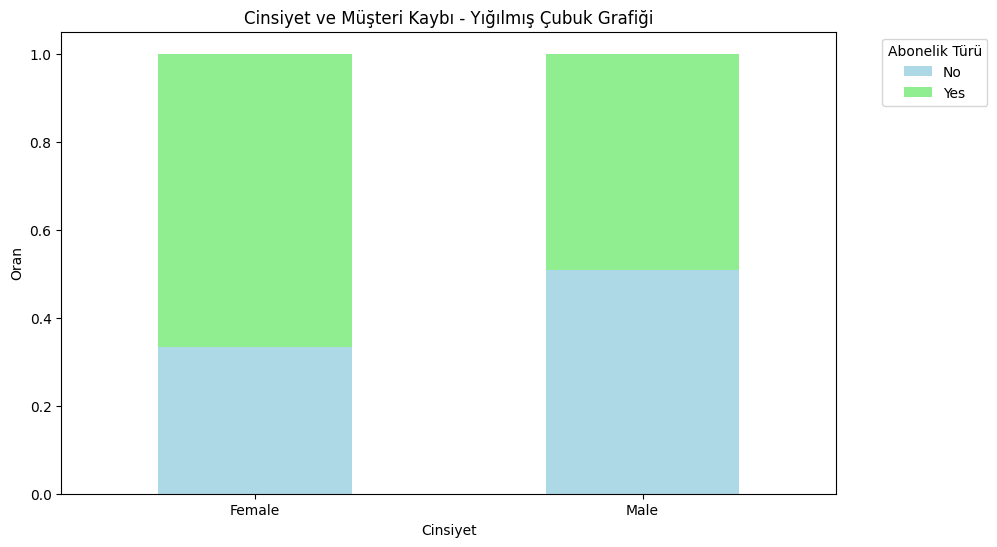

In [43]:
#Grafik 
contingency_table_normalized.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['lightblue', 'lightgreen', 'lightcoral']
)
plt.title('Cinsiyet ve Müşteri Kaybı - Yığılmış Çubuk Grafiği')
plt.xlabel('Cinsiyet')
plt.ylabel('Oran')
plt.xticks(rotation=0)
plt.legend(title='Abonelik Türü', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


****

#  Gender Sütundaki Eksik Verilerin Doldurulması

In [44]:
df1_ = df_cleaned.copy()

In [45]:
# Churn = Yes olanlarda %66.66 oranında kadın (Female) var
# Churn = No olanlarda ise %50.90 erkek (Male) oranı var

# Eksik verileri doldurma
def fill_gender(row):
    if pd.isnull(row['Gender']):  # Eğer Gender eksikse
        if row['Churn'] == 'Yes':  # Churn = Yes ise
            return 'Female'  # Kadın olarak doldur
        else:  # Churn = No ise
            return 'Male'  # Erkek olarak doldur
    else:
        return row['Gender']  # Zaten varsa, olduğu gibi bırak

# Gender sütunundaki eksik verileri doldur
df1_['Gender'] = df1_.apply(fill_gender, axis=1)

In [46]:
missing_values = df1_.isna().sum()

print(missing_values)

Age                  12624
Gender                   0
Tenure               12487
Usage Frequency      12627
Support Calls        12518
Payment Delay        12553
Subscription Type    12721
Contract Length      12652
Total Spend          12666
Last Interaction     12645
Churn                12452
dtype: int64


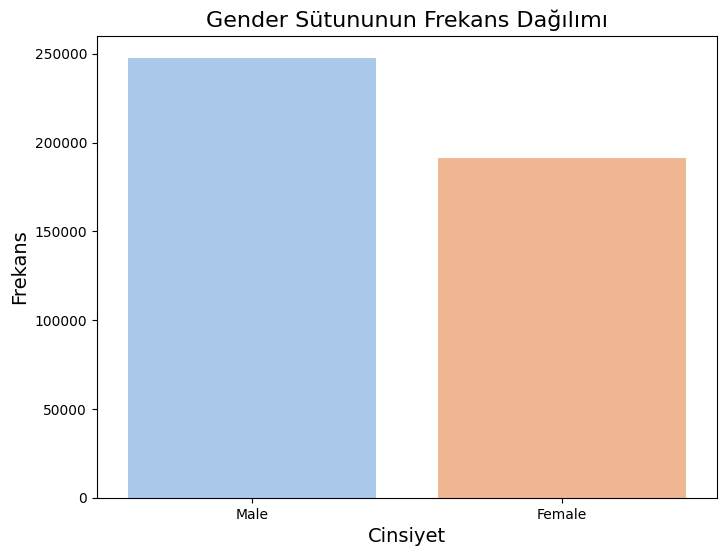

Gender
Male      247790
Female    191468
Name: count, dtype: int64

In [47]:
#Gender sütunundaki değerlerin sdağılımı
#Gender sütunundaki frekansların hesaplanması
gender_counts = df1_['Gender'].value_counts()

#Çubuk grafiğin çizilmesi
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

plt.title("Gender Sütununun Frekans Dağılımı", fontsize=16)
plt.xlabel("Cinsiyet", fontsize=14)
plt.ylabel("Frekans", fontsize=14)
plt.xticks(rotation=0)
plt.show()

gender_counts

-> Burada df1_ adlı veri seti:

- 2den fazla eksik sütunu olan satırların silinmiş 
- Gender sütununun elsik değerlerinin doldurulmuş 

****

# 5. 1. 2. Contract Length Kategorik Sütununun Analizi

****

~ Contract Length (Sözleşme Süresi), bir müşteriyle yapılan sözleşmenin süresini belirtir (örneğin, yıllık, aylık, üç aylık).

~ Bu sütun, birçok başka sütunla ilişkili olabilir, çünkü sözleşme süresi, müşteri davranışları, harcama alışkanlıkları ve abonelik türü gibi faktörleri etkileyebilir.

~ Subscription Type (Abonelik Türü): Müşterinin sözleşme süresi, seçtiği abonelik türünü etkileyebilir. Örneğin, yıllık sözleşme yapan müşteriler genellikle daha pahalı ve daha kapsamlı bir abonelik seçerken, aylık sözleşme yapanlar daha düşük abonelik türlerini tercih edebilirler.

~Total Spend (Toplam Harcama): Müşterinin sözleşme süresi, toplam harcamasını etkileyebilir. Genellikle uzun süreli sözleşmelere sahip müşteriler daha yüksek harcamalar yapabilir.

~Tenure (Müşteri Süresi): Müşteri süresi, sözleşme süresiyle de ilişkili olabilir. Örneğin, uzun süreli sözleşmeye sahip müşteriler, daha uzun süreli müşteri olabilirler.

~Churn (Müşteri Kaybı): Sözleşme süresi, müşterinin hizmetten vazgeçip geçmemesini etkileyebilir. Kısa sözleşmeye sahip müşteriler, daha kolay terk edebilirler.

~ Bu analizde de df1_ adlı verisetini kullanıyoruz çünkü burada doldurulmuş Gender sütunuyla bir analiz yapamaycağız.

In [48]:
# Eksik veriler
df1_.isna().sum()

df1_['Contract Length'].value_counts()

Contract Length
Annual       171430
Quarterly    170867
Monthly       84309
Name: count, dtype: int64

****

~Bu kod, her bir Contract Length (Sözleşme Süresi) değeri için, o süreye sahip olan abonelik türlerinin en sık görülenini döndürür.

In [49]:
#Contract Length ve Subscription Type arasındaki ilişki
contract_subscription_mode = df1_.groupby('Contract Length')['Subscription Type'].apply(lambda x: x.mode()[0])

print(contract_subscription_mode)


Contract Length
Annual       Standard
Monthly       Premium
Quarterly    Standard
Name: Subscription Type, dtype: object


/tmp/ipykernel_1818/87375012.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_subscription_mode = df1_.groupby('Contract Length')['Subscription Type'].apply(lambda x: x.mode()[0])


~Annual (Yıllık) sözleşme süresi için en sık tercih edilen abonelik türü Standard. Yani, yıllık sözleşme yapan kullanıcılar çoğunlukla standart abonelik türünü tercih ediyor.

~ Monthly (Aylık) sözleşme süresi için en sık tercih edilen abonelik türü Premium. Yani, aylık sözleşme yapan kullanıcılar genellikle premium abonelik türünü seçiyor.

~ Quarterly (Üç aylık) sözleşme süresi için en sık tercih edilen abonelik türü Standard. Yani, üç aylık sözleşme yapan kullanıcılar daha çok standart aboneliği tercih ediyor.

****

 ~ Bu kod (Sözleşme Süresi) sütununa göre gruplama yapar ve her grup için Total Spend (Toplam Harcama) sütununun ortalamasını hesaplar.

In [50]:
# Contract Length ve Total Spend arasındaki ilişki
contract_spend_mean = df1_.groupby('Contract Length')['Total Spend'].mean()

print(contract_spend_mean)

Contract Length
Annual       651.821527
Monthly      550.626182
Quarterly    651.510526
Name: Total Spend, dtype: float64


/tmp/ipykernel_1818/2864977964.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_spend_mean = df1_.groupby('Contract Length')['Total Spend'].mean()


~Annual (Yıllık) sözleşme süresi için ortalama harcama 651.81 birim. Yıllık sözleşme yapan kullanıcılar, ortalama olarak en yüksek harcamayı yapıyorlar.

~Monthly (Aylık) sözleşme süresi için ortalama harcama 550.63 birim. Aylık sözleşme yapan kullanıcıların harcaması, yıllık sözleşmeye sahip olanlardan biraz daha düşük.

~Quarterly (Üç aylık) sözleşme süresi için ortalama harcama 651.51 birim. Üç aylık sözleşme yapan kullanıcıların harcaması, yıllık sözleşme yapanlarla hemen hemen aynı.

~ Bu durum, yıllık ve üç aylık sözleşme yapan kullanıcıların daha uzun süreli taahhütlerde bulunarak, daha fazla harcama yapmayı tercih ettiklerini gösteriyor. Aylık sözleşme yapanlar ise, kısa süreli taahhütler ile genellikle daha düşük harcama yapma eğilimindeler.

****

~ Bu kod gruplama yaparak, her bir Contract Length (Sözleşme Süresi) için ortalama Tenure (Geçirdiği Zaman) değerini hesaplıyor.

~ Bu, farklı sözleşme sürelerinin (yıllık, aylık, üç aylık) ortalama müşteri süresini nasıl etkilediğini gösterir.

In [51]:
contract_tenure_mean = df1_.groupby('Contract Length')['Tenure'].mean()
print(contract_tenure_mean)

Contract Length
Annual       31.440567
Monthly      30.547829
Quarterly    31.416318
Name: Tenure, dtype: float64


/tmp/ipykernel_1818/4079757518.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_tenure_mean = df1_.groupby('Contract Length')['Tenure'].mean()


~ Farklı sözleşme süreleri, kullanıcıların geçirdiği süre üzerinde çok büyük bir etkiye sahip değil gibi görünüyor. Bu, kullanıcıların farklı sözleşme türlerine rağmen benzer sürelerde hizmet aldıklarını gösteriyor.

****

~Bu kod, Contract Length (Sözleşme Süresi) ile Churn arasındaki ilişkiyi, her bir Contract Length kategorisi için churn oranını (yani churn olan müşteri oranını) hesaplayarak incelemek için.

In [52]:
churn_by_contract = df1_.groupby('Contract Length')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_contract)

Churn                  No       Yes
Contract Length                    
Annual           0.539355  0.460645
Monthly          0.000000  1.000000
Quarterly        0.539929  0.460071


/tmp/ipykernel_1818/655991480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_contract = df1_.groupby('Contract Length')['Churn'].value_counts(normalize=True).unstack()


~ Her Contract Length kategorisi için churn olan ve olmayan müşteri oranlarını gösteriliyor.

~  Annual (Yıllık Sözleşme)
Churn No: 0.539355 (Yıllık sözleşme yapan müşterilerin %53.94'ü churn olmamıştır.)
Churn Yes: 0.460645 (Yıllık sözleşme yapan müşterilerin %46.06'sı churn olmuştur.)

~ Monthly (Aylık Sözleşme)
Churn No: 0.000000 (Aylık sözleşme yapan müşterilerin hiçbiri churn olmamıştır.)
Churn Yes: 1.000000 (Aylık sözleşme yapan tüm müşteriler churn olmuştur.)
!!Aylık sözleşme yapan müşterilerin tamamı churn olmuştur. Yani, aylık sözleşme yapan müşterilerin hepsi bir şekilde şirketle ilişkisini sonlandırmıştır.

~ Quarterly (Üç Aylık Sözleşme)
Churn No: 0.539929 (Üç aylık sözleşme yapan müşterilerin %53.99'u churn olmamıştır.)
Churn Yes: 0.460071 (Üç aylık sözleşme yapan müşterilerin %46.01'i churn olmuştur.)

****

# Contract Length Sütunundaki Eksik Verilerin Doldurulması

****

In [53]:
df2_ = df1_.copy()

~ Yukarıdaki analizlere göre Contract Lengt ile Churn ve Subscription Type sütunları arasında daha güçlü bir ilişki kurabildim.
~ Bu yüzden Contract Length'deki eksik verileri buna göre doldurucam.

Premium ve Churn = Yes → Contract Length = "Monthly"

Premium ve Churn = No → Contract Length = "Monthly" (Çünkü Premium'lar genellikle aylık sözleşmeler yapar)

Standard ve Churn = Yes → Contract Length = "Monthly" (Churn yüksek, dolayısıyla kısa süreli sözleşme olan Monthly)

Standard ve Churn = No → Contract Length = "Annual" veya "Quarterly" (Churn düşük olduğunda, yıllık ya da üç aylık sözleşme daha yaygındır)

In [54]:
def fill_contract_length(row):
    if pd.isna(row['Contract Length']):
        # Premium Subscription
        if row['Subscription Type'] == 'Premium':
            if row['Churn'] == 'Yes':
                return 'Monthly'  # Churn = Yes ise Monthly
            else:
                return 'Monthly'  # Churn = No ise de genellikle Monthly

        # Standard Subscription
        elif row['Subscription Type'] == 'Standard':
            if row['Churn'] == 'Yes':
                return 'Monthly'  # Churn = Yes ise Monthly
            else:
                return 'Annual'  # Churn = No ise Annual veya Quarterly, burada Annual seçilebilir

    return row['Contract Length']  # Eğer Contract Length zaten varsa, onu bırak

# Eksik Contract Length değerlerini doldur
df2_['Contract Length'] = df2_.apply(fill_contract_length, axis=1)


~ Premium abonelik tipi için, Churn'e bakarak sözleşme türünü Monthly olarak doldurur.
Standard abonelik tipi için, Churn = Yes ise sözleşme türünü Monthly, Churn = No ise Annual olarak doldurur.

In [55]:
missing_values = df2_.isna().sum()

print(missing_values)

Age                  12624
Gender                   0
Tenure               12487
Usage Frequency      12627
Support Calls        12518
Payment Delay        12553
Subscription Type    12721
Contract Length       4252
Total Spend          12666
Last Interaction     12645
Churn                12452
dtype: int64


Eksik olan değerler, bazı Subscription Type ve Churn kombinasyonları için mevcut olmayabilir. Örneğin:

Premium tipi ve Churn = "No" olanlar genellikle Monthly sözleşme yapıyor olabilir, ama bazen veri setinde bu kombinasyon eksik olabilir.
Standard tipi ve Churn = "Yes" olanlar için Monthly dolmuşken, bu kombinasyonun da veri setinde eksik olabilir.

~ Kalan eksik verileri siliyoruz.

In [56]:
df2_cleaned = df2_.dropna(subset=['Contract Length'], inplace=False)

In [57]:
missing_values = df2_cleaned.isna().sum()

print(missing_values)

Age                  12522
Gender                   0
Tenure               12386
Usage Frequency      12520
Support Calls        12417
Payment Delay        12467
Subscription Type    12447
Contract Length          0
Total Spend          12571
Last Interaction     12556
Churn                12361
dtype: int64


-> df2_cleaned veriseti:

- 2den fazla eksik sütunu olan satırların silinmiş
  - 
Gender sütununun elsik değerlerinin doldurulmu
  
- Contract Length sütunlarının eksik değerleri silinmiş ve doldurulmuşş

****

# 5. 1. 3. Subscription Type Sütununun Analizi

~Bu kod, her Churn (müşteri kaybı) ve Contract Length (sözleşme süresi) kombinasyonu için en sık görülen Subscription Type değerini göster

In [58]:
# Churn ve Contract Length'e göre en yaygın Subscription Type'ı bulma
# Burada analizi Contraact Length doldurmadan önceki veriseti üzerinde yapıyoruz yani df1_
subscription_type_mode = df2_cleaned.groupby(['Churn', 'Contract Length'])['Subscription Type'].apply(lambda x: x.mode()[0])

print(subscription_type_mode)

Churn  Contract Length
No     Annual             Standard
       Monthly             Premium
       Quarterly           Premium
Yes    Annual             Standard
       Monthly             Premium
       Quarterly          Standard
Name: Subscription Type, dtype: object


/tmp/ipykernel_1818/2362293509.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subscription_type_mode = df2_cleaned.groupby(['Churn', 'Contract Length'])['Subscription Type'].apply(lambda x: x.mode()[0])


Churn = No (Müşteri Kaybı Yok):
Annual (Yıllık) sözleşmesi için Subscription Type genellikle Standard.

Monthly (Aylık) sözleşmesi için Subscription Type genellikle Premium.

Quarterly (Çeyreklik) sözleşmesi için Subscription Type genellikle Premium.

-----

Churn = Yes (Müşteri Kaybı Var):

Annual (Yıllık) sözleşmesi için Subscription Type genellikle Standard.

Monthly (Aylık) sözleşmesi için Subscription Type genellikle Premium.

Quarterly (Çeyreklik) sözleşmesi için Subscription Type genellikle Standard.


 Örneğin, eğer bir müşteri Churn = Yes ve Contract Length = Quarterly ise, Subscription Type'ı Standard olarak doldurabiliriz.

# Subscription Type Sütunun Eksik Verilerinin Doldurulması

In [59]:
df3_ = df2_cleaned.copy()

burada df3_  gender ve contract length doldurulması yapılmış yani verisetinin son hali olan df2_cleanedın koopyası kısaca verisetinin şuana kadarki son hali.

In [60]:
def fill_subscription_type_based_on_churn_contract(row):
    if pd.isna(row['Subscription Type']):
        # Churn ve Contract Length'e göre en yaygın Subscription Type değerini alıyoruz
        return subscription_type_mode.get((row['Churn'], row['Contract Length']), row['Subscription Type'])
    return row['Subscription Type']

df3_['Subscription Type'] = df3_.apply(fill_subscription_type_based_on_churn_contract, axis=1)

In [61]:
missing_values = df3_.isna().sum()

print(missing_values)

Age                  12522
Gender                   0
Tenure               12386
Usage Frequency      12520
Support Calls        12417
Payment Delay        12467
Subscription Type      305
Contract Length          0
Total Spend          12571
Last Interaction     12556
Churn                12361
dtype: int64


In [62]:
df3_cleaned = df3_.dropna(subset=['Subscription Type'], inplace=False)

In [63]:
missing_values = df3_cleaned.isna().sum()

print(missing_values)

Age                  12522
Gender                   0
Tenure               12386
Usage Frequency      12520
Support Calls        12417
Payment Delay        12467
Subscription Type        0
Contract Length          0
Total Spend          12571
Last Interaction     12556
Churn                12056
dtype: int64


-> df3_cleaned veriseti:


- 2den fazla eksik sütunu olan satırların silinmiş
  
- Gender sütununun elsik değerlerinin doldurulmuş
  
- Contract Length sütunlarının eksik değerleri silinmiş ve doldurulmuş
  
- Subscription Type sütunlarının eksik değerleri silinmiş ve doldurulmuş



****

# 5. 1. 4. Churn Kategorik Sütununun Analizi

~Burada analizi Contract Lenght in sütunlarını doldurmadan önceki veri setiyle yani df1_ ile analiz yapıyorum. Daha doğru sonucu görebilmek için manipüle edilmemiş verisetine bakıyorum

In [64]:
# Örnek: Churn ile 'Contract' sütununun ilişkisini gözlemleme
pd.crosstab(df1_['Churn'], df1_['Contract Length'])

Contract Length,Annual,Monthly,Quarterly
Churn,,,
No,89814,0,89679
Yes,76707,81851,76415


~ Burada ve yukarda elde ettiğimiz Churn ve Contract Lenght ilişkisine göre aylık sözleşme yapan müşterileriin hepsi kaybedilmiş, yani bu grup yüksek bir churn oranına sahip. Aylık sözleşmelerin müşteri kaybı üzerinde önemli bir etkisi olduğu söylenebilir.

# Churn Sütununun Eksik Verilerinin Doldurulması

In [65]:
df4_ = df3_cleaned.copy()

~ Contract Length'i aylık olanların Churn'ünü yes olarak dolduruyoruz.

In [66]:
df4_.loc[df4_['Contract Length'] == 'Monthly', 'Churn'] = df4_.loc[df4_['Contract Length'] == 'Monthly', 'Churn'].fillna('Yes')

In [67]:
missing_values = df4_.isna().sum()

print(missing_values)

Age                  12522
Gender                   0
Tenure               12386
Usage Frequency      12520
Support Calls        12417
Payment Delay        12467
Subscription Type        0
Contract Length          0
Total Spend          12571
Last Interaction     12556
Churn                 9542
dtype: int64


In [68]:
df4_cleaned = df4_.dropna(subset=['Churn'], inplace=False)

In [69]:
missing_values = df4_cleaned.isna().sum()

print(missing_values)

Age                  12301
Gender                   0
Tenure               12161
Usage Frequency      12271
Support Calls        12190
Payment Delay        12225
Subscription Type        0
Contract Length          0
Total Spend          12335
Last Interaction     12334
Churn                    0
dtype: int64


-> df4_cleaned veriseti:


- 2den fazla eksik sütunu olan satırların silinmiş
  
- Gender sütununun elsik değerlerinin doldurulmuş
  
- Contract Length sütunlarının eksik değerleri silinmiş ve doldurulmuş
  
- Subscription Type sütunlarının eksik değerleri silinmiş ve doldurulmuş

- Churn sütunlarının eksik değerleri silinmiş ve doldurulmuş

****

> # 5. 2. Numerik Değişken Analizi - Eksik Veri Silme ve Doldurma

>> # 5. 2. 1. Numerik Değişken Analizi

In [70]:
categorical_features = []
numerical_features = []

for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ["category"]:
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [71]:
# Korelasyon matrisini hesapla
correlation_matrix = df_cleaned[numerical_features].corr()


correlations = correlation_matrix['Age']
print("Korelasyonlar:\n", correlations)

Korelasyonlar:
 Age                 1.000000
Tenure             -0.012397
Usage Frequency    -0.006576
Support Calls       0.158741
Payment Delay       0.061674
Total Spend        -0.084597
Last Interaction    0.028832
Name: Age, dtype: float64


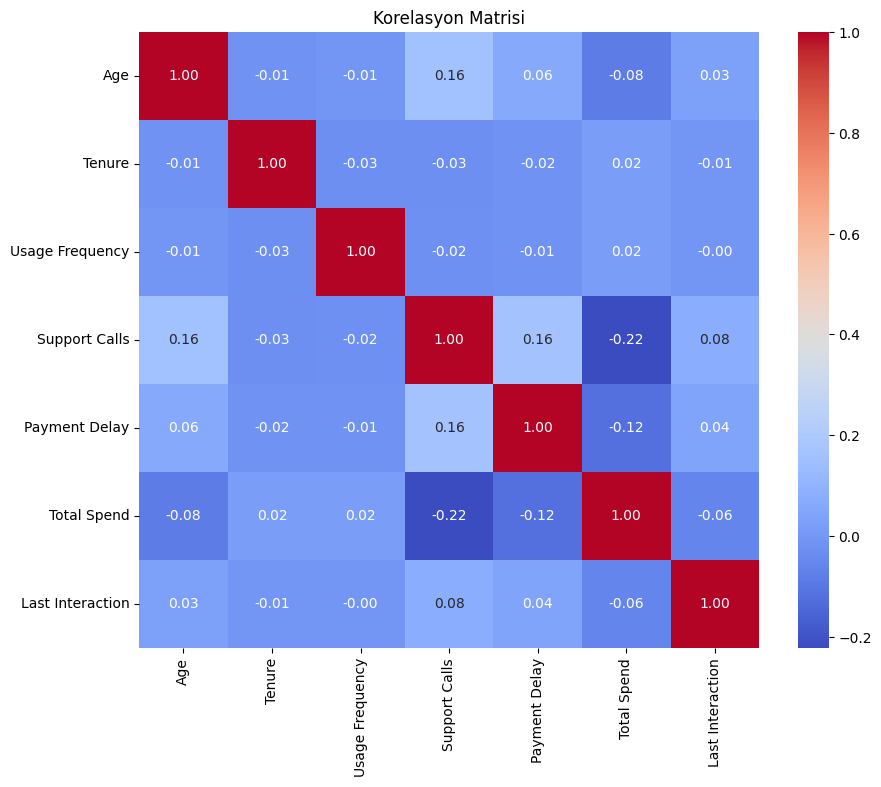

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

~ Age ile hiçbir sütun güçlü bir korelasyon göstermiyor (r > 0.7 veya r < -0.7). Bu durumda, yaşı doldurmak için diğer sütunlara dayanarak bir tahmin yapmak uygun olmaz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


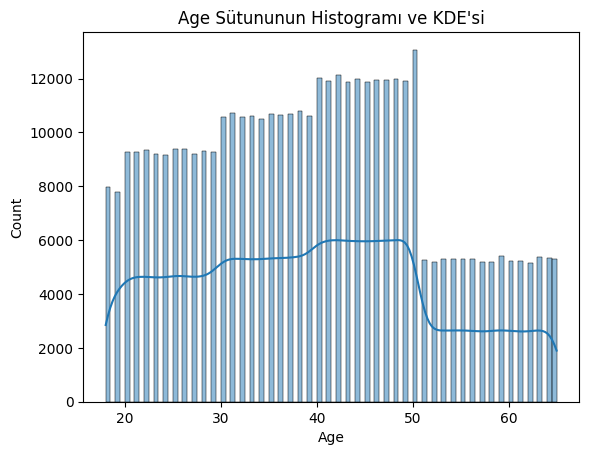

In [73]:
sns.histplot(df_cleaned['Age'], kde=True)
plt.title("Age Sütununun Histogramı ve KDE'si")
plt.show()

Histogram, yaş dağılımının normal bir çan eğrisine benzemediğini gösteriyor.
Age sütununun normal dağılım göstermediğini sonucunu çıkarabiliriz.
40-50 yaş arasında yoğunluk var.

Veri dağılımı normal olmadığı için eksik değer doldurma işleminde medyan ile doldurma yapacağım.

In [74]:
summary = df_cleaned.describe().T 

print(summary)

                     count        mean         std    min       25%    50%  \
Age               426634.0   39.369010   12.446043   18.0   29.0000   39.0   
Tenure            426771.0   31.261088   17.254318    1.0   16.0000   32.0   
Usage Frequency   426631.0   15.809519    8.586542    1.0    9.0000   16.0   
Support Calls     426740.0    3.604848    3.070797    0.0    1.0000    3.0   
Payment Delay     426705.0   12.970940    8.259463    0.0    6.0000   12.0   
Total Spend       426592.0  631.676750  240.773678  100.0  480.8575  661.0   
Last Interaction  426613.0   14.479486    8.596856    1.0    7.0000   14.0   

                    75%     max  
Age                48.0    65.0  
Tenure             46.0    60.0  
Usage Frequency    23.0    30.0  
Support Calls       6.0    10.0  
Payment Delay      19.0    30.0  
Total Spend       830.0  1000.0  
Last Interaction   22.0    30.0  


# Tenure

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


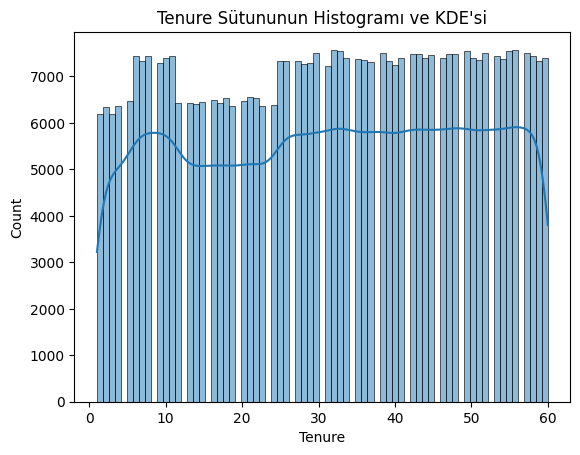

In [75]:
sns.histplot(df_cleaned['Tenure'], kde=True)
plt.title("Tenure Sütununun Histogramı ve KDE'si")
plt.show()

~ Veri, normal bir dağılım sergilemiyor. Normal dağılımda çan eğrisi formunda bir yapı gözlemlenirdi.
Dağılım, homojen bir yapı göstermediği gibi, belirli bir eğilimi (örneğin merkezi yoğunlaşmayı) işaret etmiyor.
Belirgin uç değerler veya dengesiz bir yapı gözükmediği için median ile dolduracağım

# Usage Frequency

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


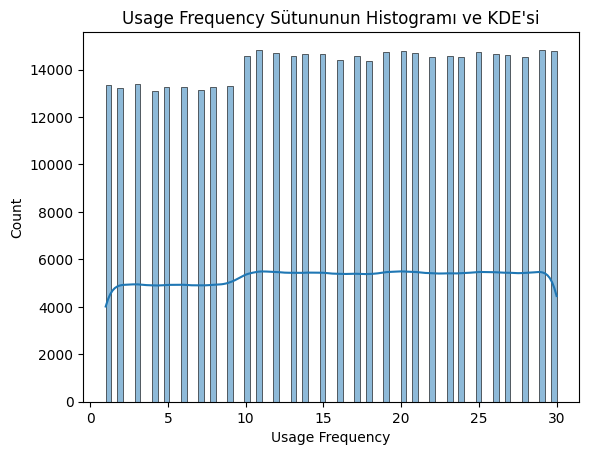

In [76]:
sns.histplot(df_cleaned['Usage Frequency'], kde=True)
plt.title("Usage Frequency Sütununun Histogramı ve KDE'si")
plt.show()

 ~KDE eğrisi düz bir çizgiye yakın. Bu da uniform düzgün yayılmış demektir. Bu sütunu da median ile dolduracağım.

# Support Calls

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


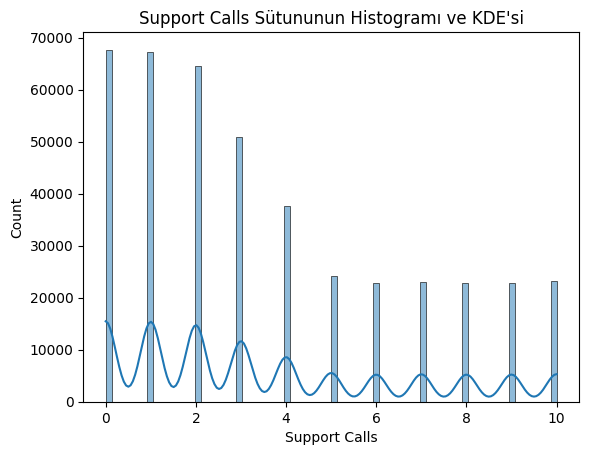

In [77]:
sns.histplot(df_cleaned['Support Calls'], kde=True)
plt.title("Support Calls Sütununun Histogramı ve KDE'si")
plt.show()

~ Pozitif (sağ) çarpıklık (positive skewed) veya pozitif eğilim.
~  Pozitif çarpıklıkta ortalama, medyan ve moddan daha büyük olur. Çünkü büyük değerler sağdaki kuyruğu uzatarak ortalamayı yukarı çeker.
~ Median ile doldurma

# Payment Delay

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


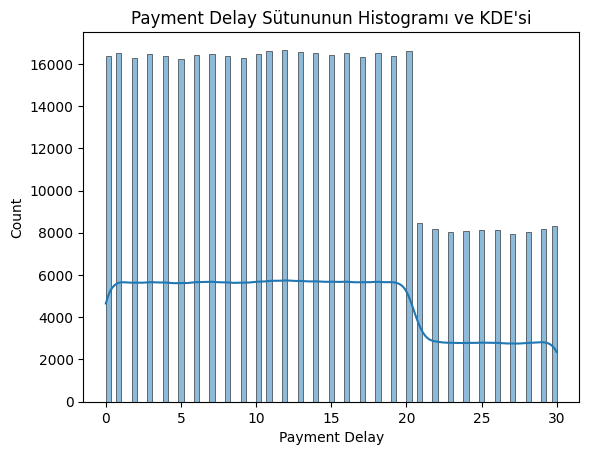

In [78]:
sns.histplot(df_cleaned['Payment Delay'], kde=True)
plt.title("Payment Delay Sütununun Histogramı ve KDE'si")
plt.show()

~ Bu da düz bir dağılımı gösteriyor. Median ile dolduracağım.

# Total Spend

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


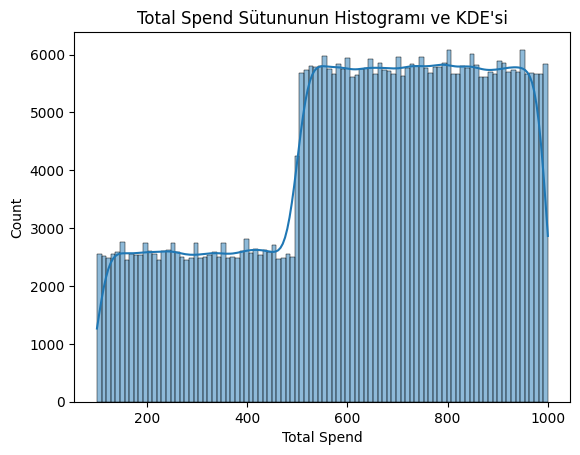

In [79]:
sns.histplot(df_cleaned['Total Spend'], kde=True)
plt.title("Total Spend Sütununun Histogramı ve KDE'si")
plt.show()

 ~ Verinin iki farklı yoğunluk bölgesine sahip olduğu gözüküyor.
 
 ~ Burada verileri iki segmente ayırıp buna göre median hesaplanıp bu şekilde doldurulabilir. 
 
 ~ Ben buradaki eksik verileri sileceğim.

# Last Interaction

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


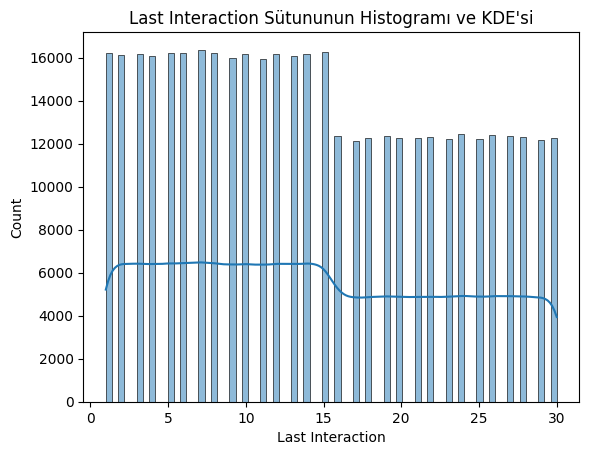

In [80]:
sns.histplot(df_cleaned['Last Interaction'], kde=True)
plt.title("Last Interaction Sütununun Histogramı ve KDE'si")
plt.show()

~ Bu da düz bir dağılımı gösteriyor. Median ile dolduracağım.

****

>> # 5. 2. 2. Numerik Değişkenlerde Eksik Veri Doldurma ve Silme

In [81]:
df5_ = df4_cleaned.copy()

In [82]:
df5_cleaned = df5_.dropna(subset=['Total Spend'], inplace=False)

In [83]:
missing_values = df5_cleaned.isna().sum()

print(missing_values)

Age                  11993
Gender                   0
Tenure               11859
Usage Frequency      11975
Support Calls        11899
Payment Delay        11924
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     11998
Churn                    0
dtype: int64


In [84]:
df6_ =  df5_cleaned.copy()

In [85]:
# Eksik değerleri median ile doldurmak ve df6_ veri setine atamak

df6_['Age'] = df6_['Age'].fillna(df6_['Age'].median())
df6_['Tenure'] = df6_['Tenure'].fillna(df6_['Tenure'].median())
df6_['Usage Frequency'] = df6_['Usage Frequency'].fillna(df6_['Usage Frequency'].median())
df6_['Support Calls'] = df6_['Support Calls'].fillna(df6_['Support Calls'].median())
df6_['Payment Delay'] = df6_['Payment Delay'].fillna(df6_['Payment Delay'].median())
df6_['Last Interaction'] = df6_['Last Interaction'].fillna(df6_['Last Interaction'].median())



In [86]:
missing_values = df6_.isna().sum()

print(missing_values)

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


****

# 6. Değişken Analizleri

# Kategorik Değişkenler

In [87]:
df6_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412824 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Age                412824 non-null  float64 
 1   Gender             412824 non-null  object  
 2   Tenure             412824 non-null  float64 
 3   Usage Frequency    412824 non-null  float64 
 4   Support Calls      412824 non-null  float64 
 5   Payment Delay      412824 non-null  float64 
 6   Subscription Type  412824 non-null  object  
 7   Contract Length    412824 non-null  object  
 8   Total Spend        412824 non-null  float64 
 9   Last Interaction   412824 non-null  float64 
 10  Churn              412824 non-null  category
dtypes: category(1), float64(7), object(3)
memory usage: 35.0+ MB


In [88]:
categorical_features = []
numerical_features = []

for col in df6_.columns:
    if df6_[col].dtype in ["object", "category"]:
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [89]:
df_categorical = df.select_dtypes(include=["object", "category"])
df_categorical.head(10)

,Gender,Subscription Type,Contract Length,Churn
0,Female,Standard,Annual,Yes
1,Female,Basic,Monthly,Yes
2,Female,Basic,Quarterly,Yes
3,Male,Standard,Monthly,Yes
4,Male,Basic,Monthly,Yes
5,Male,Premium,NaN,Yes
6,Female,Standard,Quarterly,Yes
7,Female,Premium,Annual,Yes
8,Male,Standard,Quarterly,Yes
9,Female,Standard,Quarterly,Yes


~Kategorik sütünların frekansları

In [90]:
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30) 

Column: Gender
Gender
Male      242808
Female    184889
Name: count, dtype: int64
------------------------------
Column: Subscription Type
Subscription Type
Standard    144594
Premium     144313
Basic       138775
Name: count, dtype: int64
------------------------------
Column: Contract Length
Contract Length
Annual       171885
Quarterly    171309
Monthly       84547
Name: count, dtype: int64
------------------------------
Column: Churn
Churn
Yes    242597
No     185324
Name: count, dtype: int64
------------------------------


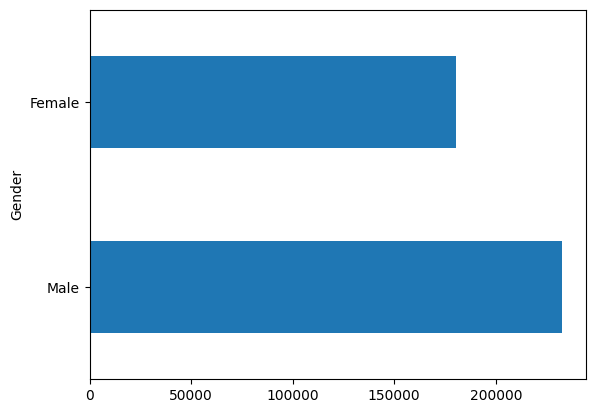

In [91]:
df6_['Gender'].value_counts().plot.barh();

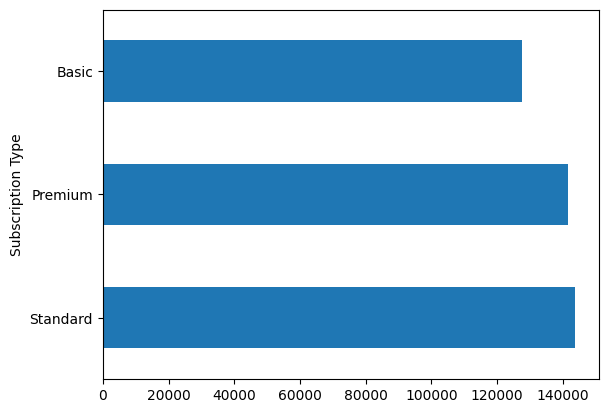

In [92]:
df6_['Subscription Type'].value_counts().plot.barh();

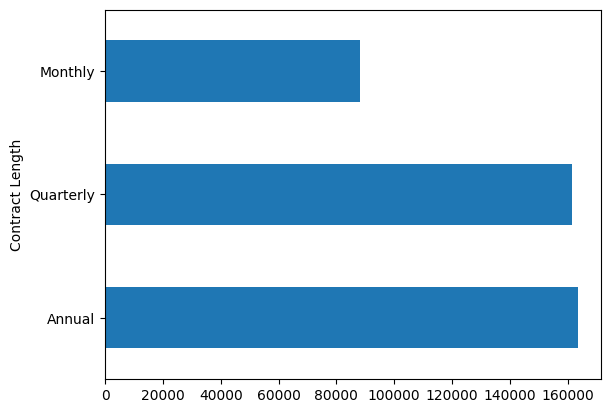

In [93]:
df6_['Contract Length'].value_counts().plot.barh();

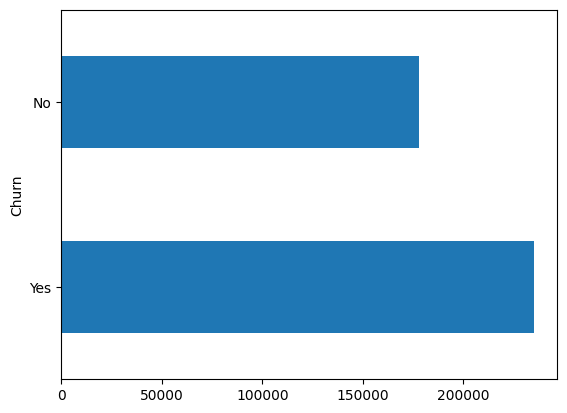

In [94]:
df6_['Churn'].value_counts().plot.barh();

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


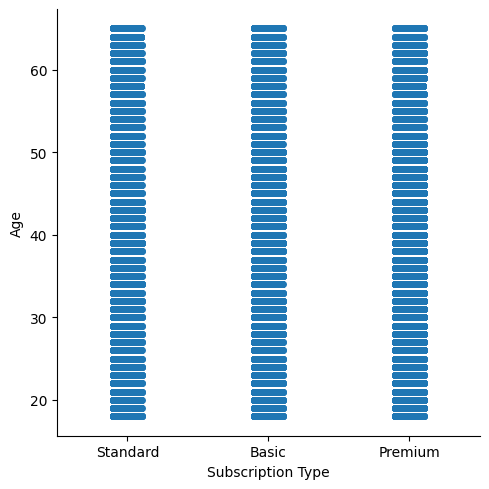

In [95]:
sns.catplot(data = df6_,
            x = "Subscription Type",
            y = "Age");

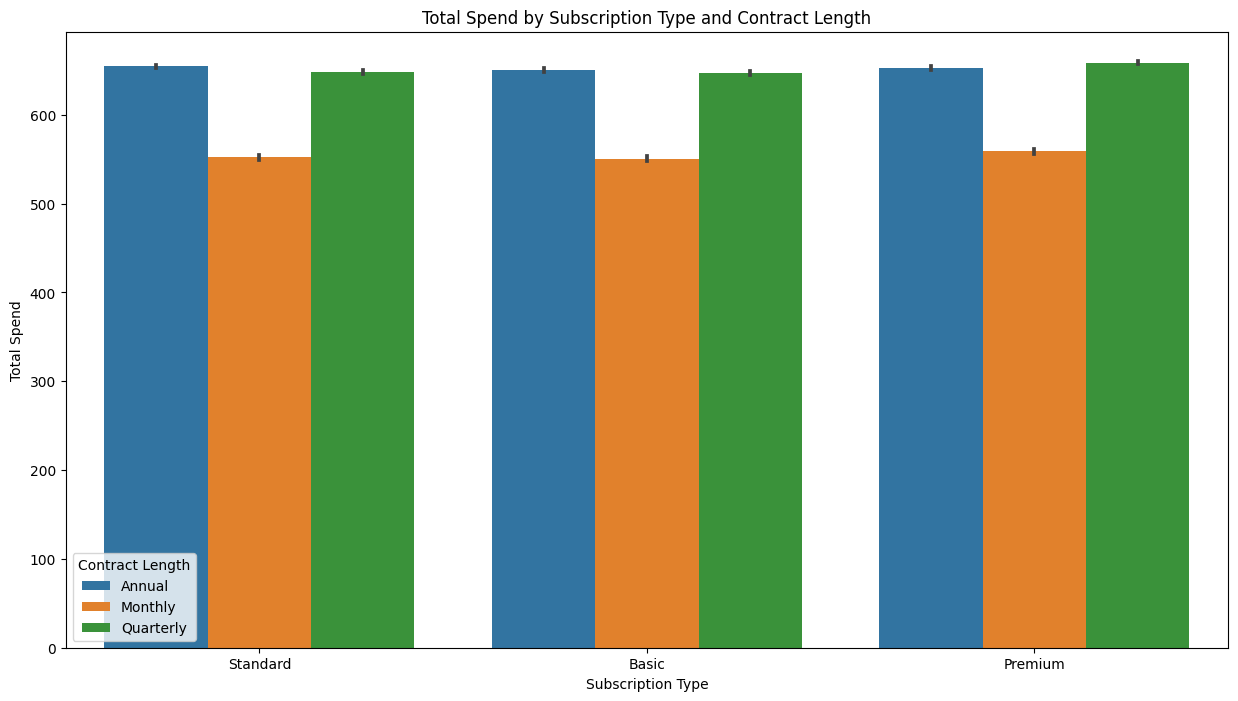

In [96]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df6_, 
            x="Subscription Type", 
            y="Total Spend", 
            hue="Contract Length")
plt.title('Total Spend by Subscription Type and Contract Length')
plt.show()

~ Burada müşterilerin abone olunan  her paket tiplerinde benzer harcamalar yaptığını görüyoruz.

~ Her paket tipinde aylık sözleşmelerde diğer sözleşme sürelerine göre daha az harcama yapıldıgı sonucunu cıkarabiliriz.

****

In [97]:
df_spend = df6_.groupby(by="Subscription Type")["Total Spend"].mean().to_frame().reset_index().sort_values(by="Total Spend", ascending=False)

df_spend

,Subscription Type,Total Spend
1,Premium,633.175277
2,Standard,631.814733
0,Basic,628.450113


 ~ Burada heer abonelik türü için ortalama harcama miktarlarını görüyoruz. Az farklarla sırasıyla premium, standar ve basic seklinde pahalıdan ucuza doğru görebiliriz.

****

In [98]:
df_calls = df6_.groupby(by="Contract Length")["Support Calls"].mean().to_frame().reset_index().sort_values(by="Support Calls", ascending=False)

df_calls

,Contract Length,Support Calls
1,Monthly,4.870120
2,Quarterly,3.258818
0,Annual,3.234997


~ Sözleşme süresine göre ortalama destek çağrısı sayılarına baktıgımızda en yüksek çağrı sayısı aylık aboneliklerde oldgunu görüyoruz.

****

In [99]:
df_churn = df6_.groupby(by="Churn")["Total Spend"].mean().to_frame().reset_index().sort_values(by="Total Spend", ascending=False)

df_churn

/tmp/ipykernel_1818/1014011599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_churn = df6_.groupby(by="Churn")["Total Spend"].mean().to_frame().reset_index().sort_values(by="Total Spend", ascending=False)


,Churn,Total Spend
0,No,749.936680
1,Yes,541.418434


 ~ Hizmetini sürdüren müşteriler (Churn = No), hizmeti bırakanlara (Churn = Yes) kıyasla daha yüksek bir ortalama harcama yapmış. Bu, hizmeti devam ettiren müşterilerin genellikle daha fazla harcama yapan kullanıcılar olduğunu gösteriyor.

****

# Numerik Değişkenler

In [100]:
df6_.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,412824.000000,412824.000000,412824.000000,412824.000000,412824.000000,412824.000000,412824.000000
mean,39.367178,31.267964,15.814398,3.593180,12.980079,631.242751,14.476799
std,12.270161,17.007928,8.463709,3.029475,8.143624,240.954151,8.473013
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,30.000000,17.000000,9.000000,1.000000,6.000000,479.000000,7.000000
50%,39.000000,32.000000,16.000000,3.000000,13.000000,660.475000,14.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,829.982500,22.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


****

~  Subscription Type'a göre Total Spend dağılımı

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

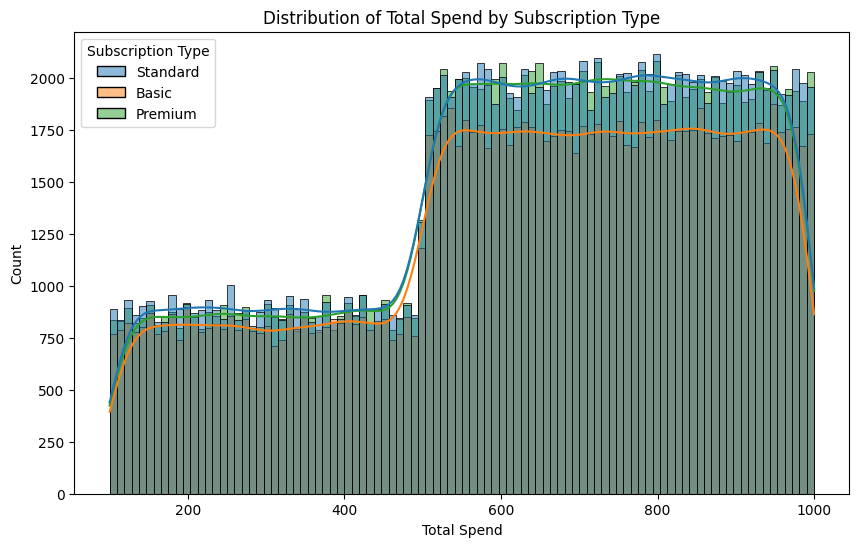

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df6_,
             x = "Total Spend",  
             kde = True,         # Kernel Density Estimation (KDE) eğrisi
             hue = "Subscription Type");  
plt.title("Distribution of Total Spend by Subscription Type")
plt.show()

****

~ Age ve Subscription Type arasındaki ilişki

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

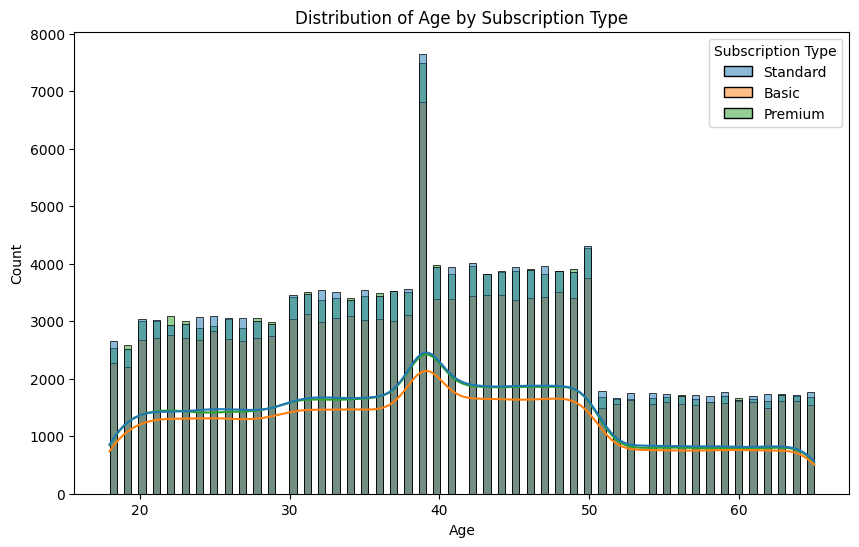

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df6_,
             x = "Age", 
             kde = True, # KDE eğrisi
             hue = "Subscription Type");  #
plt.title("Distribution of Age by Subscription Type")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

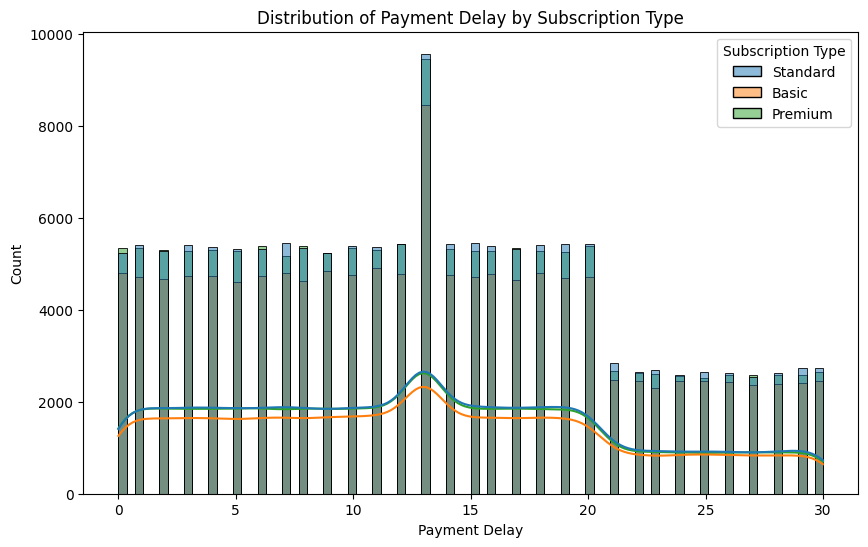

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df6_,
             x = "Payment Delay",  
             kde = True,          
             hue = "Subscription Type"); 
plt.title("Distribution of Payment Delay by Subscription Type")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

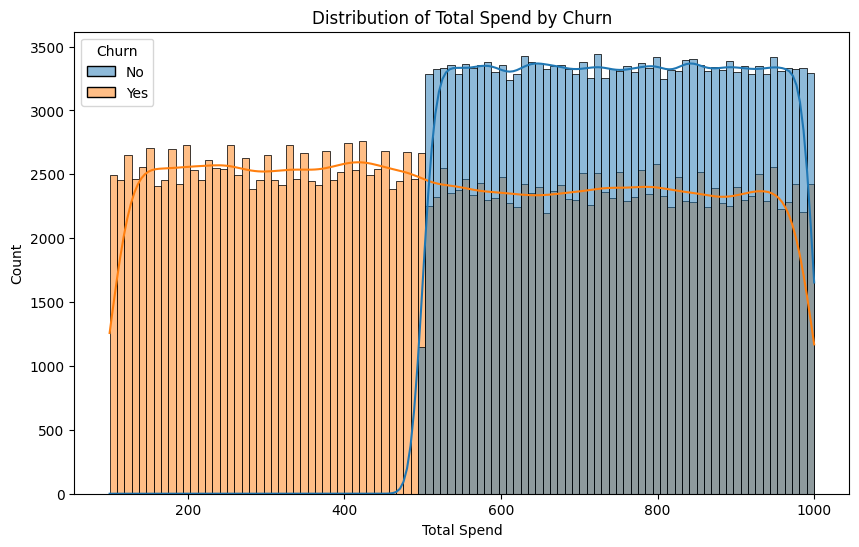

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(data = df6_,
             x = "Total Spend",  
             kde = True,        
             hue = "Churn");    
plt.title("Distribution of Total Spend by Churn")
plt.show()

****

~ Total Spend (toplam harcama) değişkeninin Subscription Type (abonelik türü) bazında dağılımı

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


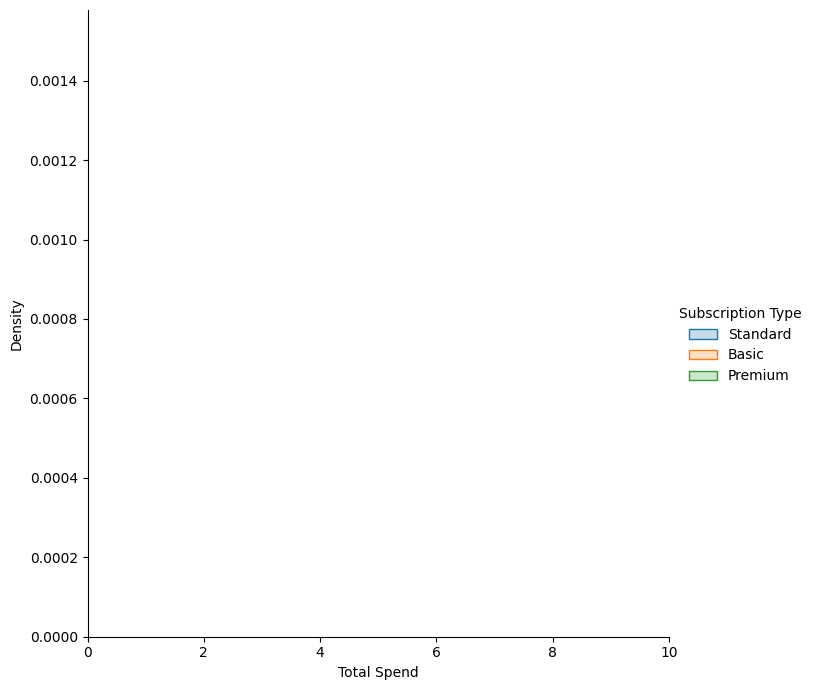

In [105]:
sns.FacetGrid(data = df6_,
              hue = "Subscription Type",
              height = 7,
              xlim = (0, 10)) \
    .map(sns.kdeplot, "Total Spend", fill = True) \
    .add_legend()



****

# 7. Feature Engineering

In [111]:
df7_ = df6_.copy()

~ yaş verisini 3 gruba (young, middle-aged, old) ayırarak daha anlamlı kategoriler oluşturma:

~Yaş verisini kategorik gruplara ayırmak, farklı müşteri segmentlerini daha iyi anlamanızı sağlar. Örneğin, "young", "middle-aged" ve "old" gibi kategoriler, farklı yaş gruplarının davranışlarını incelemenize olanak tanır. Bu segmentlere göre pazarlama stratejileri, teklifler veya müşteri hizmetleri politikaları belirlenebilir.

In [112]:
df7_['age_category'] = pd.cut(df7_['Age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'old'])


In [113]:
# Veri setinin ilk 5 gözlemi
df7_.head(n = 5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,age_category
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,Yes,young
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,Yes,old
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,Yes,old
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,Yes,old
4,23.0,Male,32.0,16.0,5.0,8.0,Basic,Monthly,617.0,20.0,Yes,young


****

~  Tenure (abonelik süresi) değeri, 1 ile 60 arasında ay bazında bir süreyi ifade ediyor

~ 1 ile 60 ay arasındaki bir süreyi anlamlı kategorilere ayırarak özellik çıkarma

~ Bu churn gibi sınıflandırma problemlerinde, modelin farklı abonelik sürelerine (tenure) göre nasıl performans gösterdiğini incelemek ve bu özelliği modelin eğitiminde kullanmak için faydalıdır. Ayrıca, verinin daha anlaşılır ve analiz edilebilir hale gelmesini sağlar.

In [114]:
df7_['tenure_category'] = pd.cut(df7_['Tenure'], bins=[0, 12, 24, 36, 48, 60], labels=['0-1 yıl', '1-2 yıl', '2-3 yıl', '3-4 yıl', '4-5 yıl'])


In [115]:
# Veri setinin ilk 5 gözlemi
df7_.head(n = 5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,age_category,tenure_category
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,Yes,young,3-4 yıl
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,Yes,old,4-5 yıl
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,Yes,old,1-2 yıl
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,Yes,old,3-4 yıl
4,23.0,Male,32.0,16.0,5.0,8.0,Basic,Monthly,617.0,20.0,Yes,young,2-3 yıl


****

In [117]:
df7_.dtypes

Age                   float64
Gender                 object
Tenure                float64
Usage Frequency       float64
Support Calls         float64
Payment Delay         float64
Subscription Type      object
Contract Length        object
Total Spend           float64
Last Interaction      float64
Churn                category
age_category         category
tenure_category      category
dtype: object

****

# 8. Sonuç ve Öneriler

**SONUÇLAR**

~Cinsiyetin abonelik türü seçiminde belirgin bir fark yaratmadığı görülüyor. Bu da abonelik türlerinin cinsiyetten bağımsız olarak tercih edildiğini gösteriyor.

~ Cinsiyet, sözleşme süresi tercihlerinde farklılık yaratıyor. Erkekler yıllık sözleşme tercihi yaparken, kadınlar daha çok aylık sözleşmeleri tercih ediyor.

~~ Kadın müşterilerin daha fazla kaybolduğu gözlemi, kadın müşteri kayıplarını hedef alacak özel stratejilerin geliştirilmesi gerektiğini gösteriyor.

~ Sözleşme süresi ve abonelik türü arasında belirgin bir ilişki var. Yıllık sözleşme, daha çok Standart abonelikle tercih edilirken, aylık sözleşme Premium abonelikle tercih ediliyor.

~ Yıllık ve üç aylık sözleşme türündeki müşteriler, aylık sözleşmeli müşterilere kıyasla daha yüksek harcama yapma eğilimindedir.

~  Yıllık ve üç aylık sözleşmelerin müşterileri, daha uzun süreli müşterilerdir. Aylık sözleşme genellikle daha kısa süreli müşterilerle ilişkilidir.

~ Aylık sözleşmeli müşterilerin tamamı kaybedilmektedir, bu da aylık sözleşme türünde ciddi bir müşteri kaybı riski olduğunu gösteriyor. Yıllık ve üç aylık sözleşme türlerinde ise müşteri kaybı oranı daha dengeli.

~ Müşterilerin çoğu orta yaşlarda ve uzun süreli abonelikler tercih ediyor. Yaşın, müşteri kaybı ve diğer özelliklerle ilişkilendirilmesi faydalı olabilir.

~ Müşteri desteği çağrı sayısının fazla olması, müşteri memnuniyeti ile ilgili bir sorun olabilir. Bu da müşteri kaybını tahmin etmek için önemli bir faktör olabilir.

**ÖNERİLER**

- Bu veri seti, müşteri kaybı (churn) tahmini için oldukça değerli bilgiler sunmaktadır ve çeşitli iş stratejilerini geliştirmek için kullanılabilir. Müşteri kaybı tahmin modelleri geliştirilebilir (örneğin, lojistik regresyon, rastgele ormanlar, vb.), böylece şirketler, yüksek kayıp riski taşıyan müşterilere erken müdahale edebilir ve onları elde tutmak için özel stratejiler geliştirebilir.

- Ayrıca cinsiyet bazlı müşteri davranışları incelenerek bu davranışlara göre ürünler hizmete sunulabilir.

- Farklı sözleşme türlerinde (yıllık, aylık, üç aylık) farklı müşteri segmentleri olabilir ve bu segmentlerin özellikleri farklıdır. Şirket, hangi türdeki sözleşmelerin daha fazla kayıp getirdiğini anlamak isteyebilir.

Kısaca, bir şirket bu veriler ile  müşteri kaybını tahmin edebilir ve bununla ilişkili çeşitli faktörleri analiz edebilir

****

- Müşteri kaybı (churn) tahmini problemi, sınıflandırma problemlerinden biridir çünkü her bir müşteri ya kayıp (churn) ya da sadık (non-churn) olacaktır. 
- Lojistik Regresyon (Logistic Regression) - Basit, hızlı ve yorumlanabilir bir modeldir.
- Random Forest, özellikle veride karmaşık doğrusal olmayan ilişkiler olduğunda iyi performans gösterir. Çeşitli özellikleri değerlendirebilir ve overfitting riskini azaltabilir.


****